# Import & Install Required Packages

In [97]:
import os
import itertools
import time

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras as keras

In [99]:
import matplotlib.pyplot as plt

import plotly.graph_objs as go

In [100]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist
from keras.utils import to_categorical
from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Load dataset

In [101]:
%pip install opencv-python
import cv2

Note: you may need to restart the kernel to use updated packages.


In [102]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [103]:
# def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
#     # initialize the dimensions of the image to be resized and
#     # grab the image size
#     dim = None
#     (h, w) = image.shape[:2]

#     # if both the width and height are None, then return the
#     # original image
#     if width is None and height is None:
#         return image

#     # check to see if the width is None
#     if width is None:
#         # calculate the ratio of the height and construct the
#         # dimensions
#         r = height / float(h)
#         dim = (int(w * r), height)

#     # otherwise, the height is None
#     else:
#         # calculate the ratio of the width and construct the
#         # dimensions
#         r = width / float(w)
#         dim = (width, int(h * r))

#     # resize the image
#     resized = cv2.resize(image, dim, interpolation = inter)

#     # return the resized image
#     return resized

In [104]:
# Load CSV file
dataset_path = "E:/Lian/S2/Datasets/kannada_characters/"
df = pd.read_csv(dataset_path+"kannada.csv", nrows=10)
# df = pd.read_csv(dataset_path+"kannada.csv", nrows=100)
df = pd.read_csv(dataset_path+"kannada.csv", nrows=5000)

# Prepare image paths and labels
image_paths = df['img'].values
labels = df['class'].values

X_data = []
Y_data = []

# image_size_width = 600
# image_size_height = 450
image_size_height, image_size_width = 64, 64

for img_path, label in zip(image_paths, labels):
    img = cv2.imread(os.path.join(dataset_path, img_path), cv2.IMREAD_GRAYSCALE)
    # img = image_resize(img, height = image_size_height, width=image_size_width)
    img = cv2.resize(img, (image_size_height, image_size_width))

    X_data.append(img)
    Y_data.append(label)

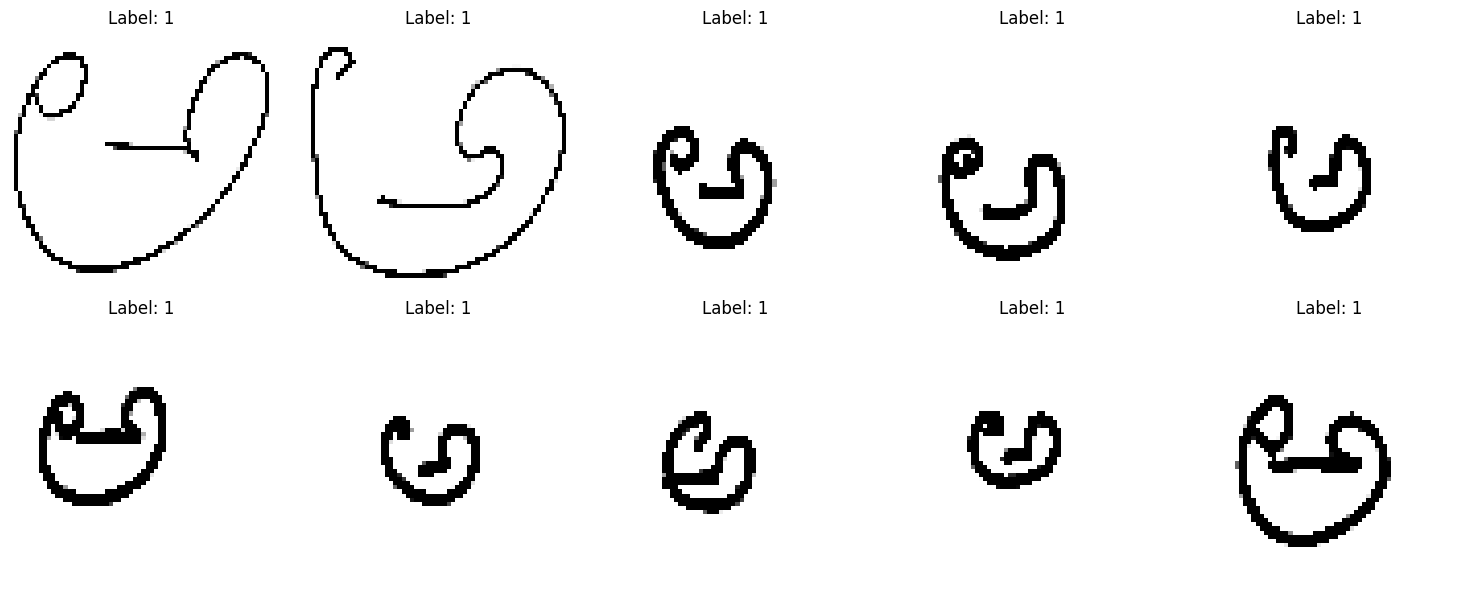

In [105]:
import math
num_images = 10
cols = 5  # Number of columns
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))  # Adjust size based on rows

# Iterate over the images and axes to plot each image
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(X_data[i], cmap='gray')  # Display the image
        ax.set_title(f'Label: {Y_data[i]}')  # Set the title
    ax.axis('off')  # Hide the axis

# Adjust layout
plt.tight_layout()
plt.show()

In [106]:
# Convert to numpy arrays and normalize pixel values
X_data = np.array(X_data).astype('float32') / 255.
Y_data = np.array(Y_data)
Y_data

array([  1,   1,   1, ..., 200, 200, 200], dtype=int64)

In [107]:
# Reshape images to fit model input
X_data_reshaped = X_data.reshape(-1, image_size_width, image_size_height, 1)
# Convert labels to one-hot encoding
num_classes = len(np.unique(Y_data))
Y_data = to_categorical(Y_data-1, num_classes=num_classes)

In [108]:

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=42)

print(f"X Training data shape: {X_train.shape}")
print(f"Y Training data shape: {Y_train.shape}")
print(f"X Test data shape: {X_test.shape}")
print(f"Y Test data shape: {Y_test.shape}")

X Training data shape: (4500, 64, 64)
Y Training data shape: (4500, 200)
X Test data shape: (500, 64, 64)
Y Test data shape: (500, 200)


# Define the CNN model

In [109]:
model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(image_size_width, image_size_height)),
        keras.layers.Reshape(target_shape=(image_size_width, image_size_height, 1)),
        keras.layers.Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((8, 8), padding='same'),
        keras.layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((4, 4), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes)
    ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 64, 64, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         136       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)               

# Compile and training the model

In [110]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [111]:
# training the model
validation_split = 0.1
history = model.fit(X_train, Y_train, epochs=10, validation_split=validation_split)
# history = model.fit(X_train, Y_train, epochs=30, validation_split=validation_split, batch_size=64)

Epoch 1/10
127/127 [==============================] - 2s 14ms/step - loss: 8.9126 - accuracy: 0.0072 - val_loss: 8.8653 - val_accuracy: 0.0000e+00
Epoch 2/10
127/127 [==============================] - 2s 12ms/step - loss: 8.7810 - accuracy: 0.0059 - val_loss: 8.5186 - val_accuracy: 0.0022
Epoch 3/10
127/127 [==============================] - 2s 13ms/step - loss: 8.3704 - accuracy: 0.0052 - val_loss: 7.6037 - val_accuracy: 0.0022
Epoch 4/10
127/127 [==============================] - 2s 13ms/step - loss: 8.4432 - accuracy: 0.0049 - val_loss: 8.3898 - val_accuracy: 0.0022
Epoch 5/10
127/127 [==============================] - 2s 13ms/step - loss: 8.5280 - accuracy: 0.0049 - val_loss: 7.8161 - val_accuracy: 0.0022
Epoch 6/10
127/127 [==============================] - 1s 11ms/step - loss: 8.1855 - accuracy: 0.0049 - val_loss: 7.7013 - val_accuracy: 0.0022
Epoch 7/10
127/127 [==============================] - 1s 11ms/step - loss: 8.4337 - accuracy: 0.0049 - val_loss: 7.6292 - val_accuracy: 0.

# Result

# Visualization

In [112]:
def plot_images_sample(X, Y):

    plt.figure(figsize=(10,10))

    rand_indicies = np.random.randint(len(X), size=25)

    for i in range(25):

        plt.subplot(5,5,i+1)

        plt.xticks([])

        plt.yticks([])

        plt.grid(False)

        index = rand_indicies[i]

        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)

        # The CIFAR labels happen to be arrays,

        # which is why you need the extra index

        plt.xlabel(Y[index])

    plt.show()


# plot_images_sample(mnist_data, mnist_label)

# Draw plot for CNN training

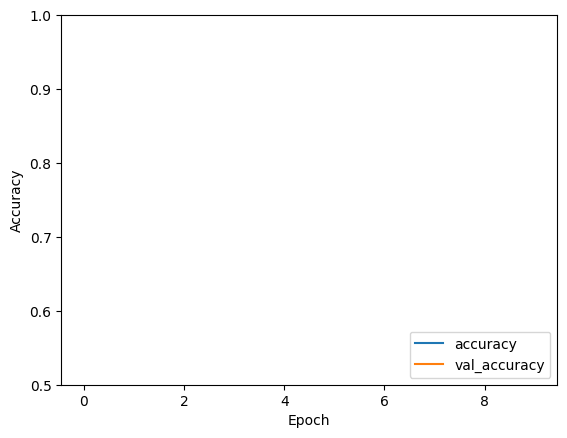

In [113]:
# Draw plot for CNN training

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0.5, 1])

plt.legend(loc='lower right')

plt.show()

In [114]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

16/16 [==============================] - 0s 5ms/step - loss: 8.4459 - accuracy: 0.0080
Test accuracy: 0.00800000037997961


# Prediction

16/16 [==============================] - 0s 5ms/step


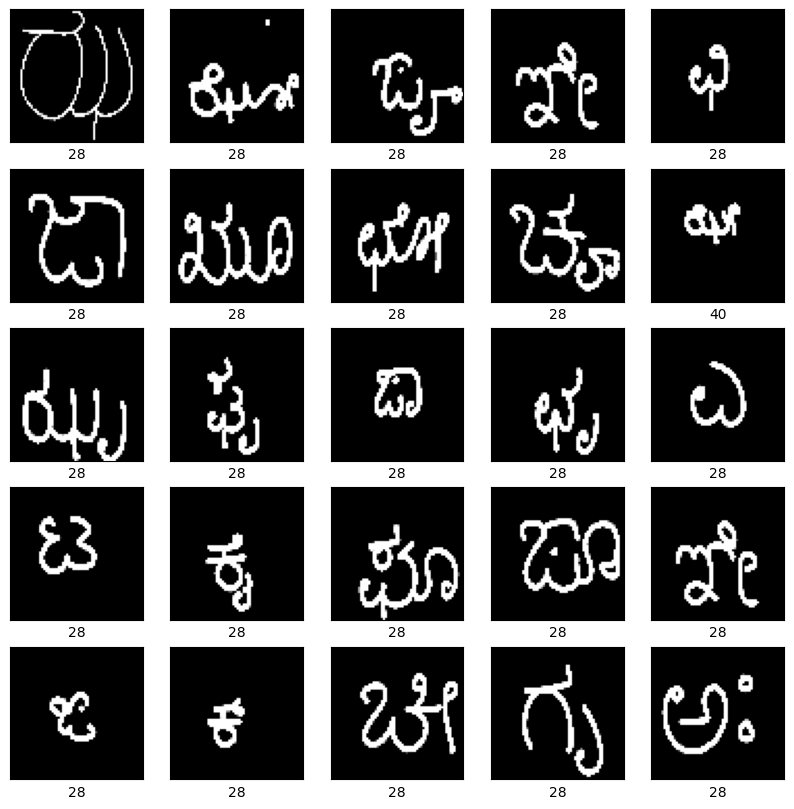

In [115]:
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)

plot_images_sample(X_test, predictions)

# Wrong test

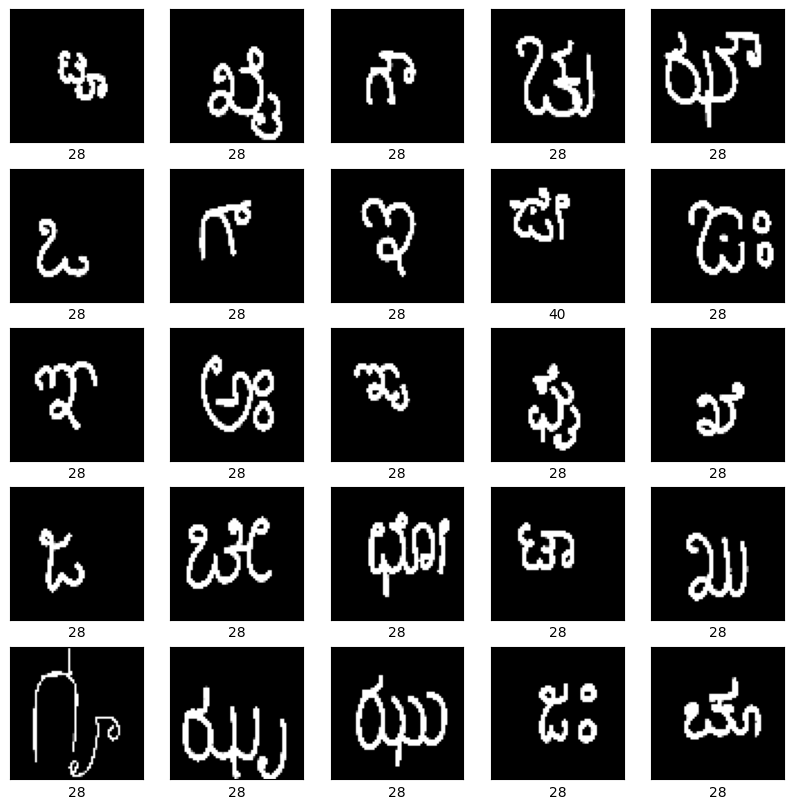

In [116]:
X_test_wrong = []

predictions_wrong = []

for i in range(len(X_test)):

    if predictions[i] != np.argmax(Y_test[i]):

        X_test_wrong.append(X_test[i])

        predictions_wrong.append(predictions[i])


plot_images_sample(X_test_wrong, predictions_wrong)

# Plotting the loss error (Plotly)

In [117]:
# # Thanks to https://www.kaggle.com/vbmokin/tensorflow-keras-gpu-for-chinese-mnist-prediction

# def create_trace(x,y,ylabel,color):

#         trace = go.Scatter(

#             x = x,y = y,

#             name=ylabel,

#             marker=dict(color=color),

#             mode = "markers+lines",

#             text=x

#         )

#         return trace



# def plot_accuracy_and_loss(train_model):

#     hist = train_model.history

#     acc = hist['accuracy']

#     val_acc = hist['val_accuracy']

#     loss = hist['loss']

#     val_loss = hist['val_loss']

#     epochs = list(range(1,len(acc)+1))

#     #define the traces

#     trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")

#     trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")

#     trace_tl = create_trace(epochs,loss,"Training loss", "Blue")

#     trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")

#     fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',

#                                                              'Training and validation loss'))

#     #add traces to the figure

#     fig.append_trace(trace_ta,1,1)

#     fig.append_trace(trace_va,1,1)

#     fig.append_trace(trace_tl,1,2)

#     fig.append_trace(trace_vl,1,2)

#     #set the layout for the figure

#     fig['layout']['xaxis'].update(title = 'Epoch')

#     fig['layout']['xaxis2'].update(title = 'Epoch')

#     fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])

#     fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

#     #plot

#     iplot(fig, filename='accuracy-loss')

# Save the model to a file

In [118]:
# model_save_path = 'cnn_model.h5'

model_save_path = 'kannada_model_1.keras'

model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 199.64 KB


In [119]:
! pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

# Define the model and apply the sparsity API

In [120]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

pruning_params = {

      # 'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=100)

      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)

  }



callbacks = [

  tfmot.sparsity.keras.UpdatePruningStep()

]



pruned_model = prune_low_magnitude(model, **pruning_params)



# Use smaller learning rate for fine-tuning

# opt = keras.optimizers.Adam(learning_rate=1e-5)
opt = keras.optimizers.Adam()


pruned_model.compile(

  # loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  loss=keras.losses.CategoricalCrossentropy(),
  optimizer=opt,

  metrics=['accuracy']

)



pruned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_reshape  (None, 64, 64, 1)        1         
 _3 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_conv2d_  (None, 64, 64, 8)        266       
 6 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 8, 8, 8)          1         
 ling2d_6 (PruneLowMagnitude                                     
 )                                                               
                                                                 
 prune_low_magnitude_conv2d_  (None, 8, 8, 16)         1042      
 7 (PruneLowMagnitude)                                           
                                                      

# Pruning Process

In [121]:
pruned_model.fit(

  X_train,

  Y_train,

  epochs=10,

  validation_split=validation_split,

  callbacks=callbacks)

Epoch 1/10
127/127 [==============================] - 4s 17ms/step - loss: 8.3594 - accuracy: 0.0049 - val_loss: 8.3146 - val_accuracy: 0.0022
Epoch 2/10
127/127 [==============================] - 2s 12ms/step - loss: 8.2932 - accuracy: 0.0049 - val_loss: 8.2381 - val_accuracy: 0.0022
Epoch 3/10
127/127 [==============================] - 2s 13ms/step - loss: 8.3134 - accuracy: 0.0049 - val_loss: 7.7009 - val_accuracy: 0.0022
Epoch 4/10
127/127 [==============================] - 2s 12ms/step - loss: 8.3233 - accuracy: 0.0052 - val_loss: 7.7367 - val_accuracy: 0.0044
Epoch 5/10
127/127 [==============================] - 2s 14ms/step - loss: 8.3732 - accuracy: 0.0052 - val_loss: 8.0949 - val_accuracy: 0.0044
Epoch 6/10
127/127 [==============================] - 2s 13ms/step - loss: 8.5089 - accuracy: 0.0054 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 7/10
127/127 [==============================] - 1s 12ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044

In [122]:
model_save_path = 'kannada_model_pruned_1.keras'

pruned_model.save(model_save_path)



# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 263.89 KB


In [123]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)

tflite_model = converter.convert()



# Save the TFLite model to a file

model_save_path = 'kannada_model_pruned_1.tflite'

with open(model_save_path, 'wb') as f:

    f.write(tflite_model)



model_size = os.path.getsize(model_save_path)

print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpib89l9jj\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpib89l9jj\assets


Model size after pruning + convert to tf lite: 57.22 KB


# Post Training Quantization

In [124]:
# Strip the pruning wrappers to finalize the pruned model

final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)



# Set quantization parameters

converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization



# Optionally, if you have representative data, you can enable full integer quantization:

# Provide a representative dataset for better accuracy in quantization

def representative_dataset():

    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?

        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?



converter.representative_dataset = representative_dataset

converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error



# Convert the model

quantized_tflite_model = converter.convert()



# Save the quantized model to a file

quantized_model = 'quantized_pruned_model_kannada_1.tflite'
with open(quantized_model, 'wb') as f:

    f.write(quantized_tflite_model)



# To load and use the TFLite model later:

interpreter = tf.lite.Interpreter(model_path=quantized_model)

interpreter.allocate_tensors()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpmw6w50jm\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpmw6w50jm\assets


In [125]:
final_model.compile(

  # loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  loss=keras.losses.CategoricalCrossentropy(),

  optimizer=opt,

  metrics=['accuracy']

)

In [126]:
final_model.fit(

  X_train,

  Y_train,

  epochs=10,

  validation_split=validation_split,

  callbacks=callbacks)

Epoch 1/10
127/127 [==============================] - 7s 50ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 2/10
127/127 [==============================] - 6s 44ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 3/10
127/127 [==============================] - 5s 41ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 4/10
127/127 [==============================] - 6s 48ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 5/10
127/127 [==============================] - 7s 52ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 6/10
127/127 [==============================] - 7s 53ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044
Epoch 7/10
127/127 [==============================] - 5s 43ms/step - loss: 8.6083 - accuracy: 0.0052 - val_loss: 8.1665 - val_accuracy: 0.0044

In [127]:
model_size = os.path.getsize(quantized_model)

print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 31.42 KB


# Optimized Model with Knowledge Distillation

In [128]:
# Custom loss function for Knowledge Distillation
def distillation_loss(y_true, y_pred, teacher_logits, temperature=5.0, alpha=0.5):
    student_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    distillation_loss = tf.keras.losses.KLDivergence()(
        tf.nn.softmax(teacher_logits / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * student_loss + (1 - alpha) * distillation_loss

# Train student model with teacher model's logits
def train_student_model(student_model, teacher_model, X_train, y_train):
    teacher_logits = teacher_model.predict(X_train)

    # Custom training loop
    start_kd_time = time.time()    
    for epoch in range(10):
        print(f"Epoch {epoch + 1}/10")
        epoch_loss = 0
        correct_predictions = 0
        total_predictions = 0
        
        for i in range(0, len(X_train), 32):
            X_batch = X_train[i:i+32]
            y_batch = y_train[i:i+32]
            with tf.GradientTape() as tape:
                y_pred = student_model(X_batch, training=True)
                loss = distillation_loss(y_batch, y_pred, teacher_logits[i:i+32])
            grads = tape.gradient(loss, student_model.trainable_variables)
            student_model.optimizer.apply_gradients(zip(grads, student_model.trainable_variables))

            # Track loss and accuracy
            epoch_loss += loss.numpy().sum() * len(y_batch)  # Ensure loss is a scalar
            correct_predictions += np.sum(np.argmax(y_pred.numpy(), axis=-1) == np.argmax(y_batch, axis=-1))
            total_predictions += len(y_batch)

        average_loss = epoch_loss / total_predictions
        accuracy = correct_predictions / total_predictions
        print(f"Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    end_time = time.time()
    total_time = end_time - start_kd_time 
    print(f"Total time: {total_time:.2f} seconds")

# Train the student model
student_model = model
train_student_model(model, final_model, X_train, Y_train)

141/141 [==============================] - 1s 4ms/step
Epoch 1/10
Loss: 145.4758, Accuracy: 0.0047
Epoch 2/10
Loss: 136.6250, Accuracy: 0.0049
Epoch 3/10
Loss: 133.0127, Accuracy: 0.0049
Epoch 4/10
Loss: 137.0269, Accuracy: 0.0049
Epoch 5/10
Loss: 131.3097, Accuracy: 0.0049
Epoch 6/10
Loss: 134.2150, Accuracy: 0.0044
Epoch 7/10
Loss: 133.8987, Accuracy: 0.0040
Epoch 8/10
Loss: 131.5376, Accuracy: 0.0033
Epoch 9/10
Loss: 137.0800, Accuracy: 0.0038
Epoch 10/10
Loss: 140.6891, Accuracy: 0.0036
Total time: 57.28 seconds


In [129]:
# Evaluate student model

student_loss, student_accuracy = student_model.evaluate(X_test, Y_test)
print(f"Student Model Accuracy: {student_accuracy}, Loss: {student_loss}")

16/16 [==============================] - 0s 4ms/step - loss: 8.4459 - accuracy: 0.0020
Student Model Accuracy: 0.0020000000949949026, Loss: 8.445881843566895


In [130]:
model_save_path = 'student_model_1_kannada.keras'
student_model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 199.64 KB
